# Problem Statement

The **SCS Curve Number Method (SCS-CN)** is used to obtain the inflow hydrograph into the detention basin 
from a community for a design storm. The computations are based on the following equations:

---

$$
S = 1000 \left(\frac{1000}{CN} - 10\right)
$$

Here, $S$ is the storage (inches), and $CN$ is the curve number.

---

$$
I_{a} = \lambda S
$$

Here, $I_{a}$ is the initial abstraction (inches), and $\lambda$ is the loss coefficient (usually assumed to be 0.2).

---

$$
Q = \frac{(P - I_{a})^2}{P - I_{a} + S}
$$

Where $Q$ is the cumulative runoff (inches), and $P$ is the total precipitation (inches) over a duration $D$.

---

$$
Q_{p} = \frac{484 \cdot A \cdot Q}{t_{p}}
$$

Where $A$ is the area (sq. mi), and $t_{p}$ is the time to peak (hours).

---

## Time to Peak

The time to peak, $t_{p}$, can be computed from storm duration and lag-time, $t_{l}$  
(the time between the center of mass of the rainstorm and the center of mass of the hydrograph) as:

$$
t_{p} = \frac{D}{2} + t_{l}
$$

Where $t_{l}$ is in hours.

---

## Lag Time and Time of Concentration

The lag time, $t_{l}$, is related to the time of concentration, $t_{c}$.  
The time of concentration is the time for water to travel from the farthest point in the watershed to the outlet.

Using **Kirpich formula**, the time of concentration (minutes) is:

$$
t_{c} = 0.0078 \cdot y^{0.77} \cdot S_{c}^{-0.385}
$$

Where:  
- $y$ = longest flow length (ft)  
- $S_{c}$ = watershed slope (ft/ft)  

The lag-time (minutes) is then:

$$
t_{l} = 0.6 \cdot t_{c}
$$

---

## Notes

- **Kirpich Formula** computes $t_{c}$ in **minutes**, while the peak flow computation requires time in **hours**.  
- Ensure unit consistency when applying these equations.  
- Once $t_{l}$ is computed, $t_{p}$ can be determined and the **SCS unit hydrograph** can be used to compute the inflow hydrograph.


time to peak (hr): 3.44 and Peak Flow (cfs): 11186.08


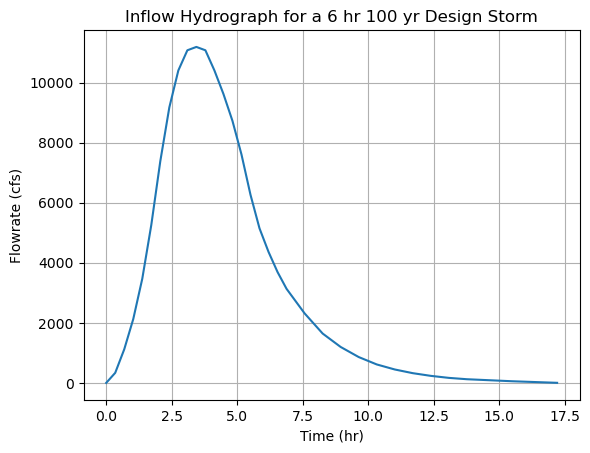

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Function to compute time of concentration using Kirpich Formula 
# and compute time to peak
def tpeak(Sc, D, L):
    y = L * 5280
    tc = 0.0078 * (y**0.77) * (Sc**(-0.385))
    tc = tc / 60   # convert minutes to hours
    tl = 0.6 * tc  # lag time
    tp = tl + D/2  # time to peak
    return tp

# Function to compute Peak flow
def Qpeak(P, CN, K, A, tp):
    S = 1000 / CN - 10
    Ia = K * P
    Q = ((P - Ia)**2) / (P - Ia + S)
    Qp = 484 * A * Q / tp
    return Qp

# Read Data File (your uploaded file)
uh = pd.read_csv("SCS_dimensionless_UH.csv")

# Input Parameters
D = 6     # storm duration in hours
P = 11.3  # total storm volume in inches
CN = 89   # curve number
Sc = 0.02 # slope of watershed (ft/ft)
L = 2     # length of watershed in miles
K = 0.2   # loss coefficient Lambda
A = 10    # watershed area in sq. miles

# Compute Time to Peak and Peak Flow
tp = tpeak(Sc, D, L)
Qp = Qpeak(P, CN, K, A, tp)
print(f'time to peak (hr): {np.round(tp,2)} and Peak Flow (cfs): {np.round(Qp,2)}')

# Compute and Plot the Inflow Hydrograph
T = uh['t/Tp'] * tp
Q = uh['Q/Qp'] * Qp

plt.plot(T, Q)
plt.xlabel('Time (hr)')
plt.ylabel('Flowrate (cfs)')
plt.grid()
plt.title('Inflow Hydrograph for a 6 hr 100 yr Design Storm')
plt.show()
